## AtliQ Project

In this project I want to use all my knowledge and produce an analysis on the data for the AtliQ Hardware company. I want to provide a product analysis where I will look into the products of the AtliQ Hardware and analyse what products are the bestsellers. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3
con = sqlite3.connect('/Users/sergeymedvedev/Downloads/atliq_db.sqlite3') #-->specify the path to your 
#downloaded database just like you read csv files

In [3]:
pd.options.display.max_colwidth = 100

In [4]:
### check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


I am interested in looking firstly, what products there are in different divisions

In [5]:
### execute simple query in Python with your connection
query1="""
Select distinct division as Division, count(distinct product) as "Number of Products", count(variant) as "Number of Variants"
from dim_product
group by division
"""
product=pd.read_sql_query(query1, con)
product 

,Division,Number of Products,Number of Variants
0,N & S,12,36
1,P & A,40,200
2,PC,21,161


We can see that not only the number of products in Peripherals division is the biggest, comparing to other divisions but also the number of variants. It is reasonable to concentrate on P&A division. 

In [6]:
### execute simple query in Python with your connection
query2="""
Select dim_product.product_code, dim_product.division, dim_product.segment, dim_product.category, dim_product.product, dim_product.variant, fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity as "Quantity Sold", fact_sales_monthly.fiscal_year as "Fiscal Year"
from dim_product
right join fact_sales_monthly
on fact_sales_monthly.product_code=dim_product.product_code
where division = 'P & A'
"""
product=pd.read_sql_query(query2, con)
product 

,product_code,division,segment,category,product,variant,product_code,Quantity Sold,Fiscal Year
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,51,2018
1,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,77,2018
2,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,17,2018
3,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,6,2018
4,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,5,2018
...,...,...,...,...,...,...,...,...,...
67245,A0418150104,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,A0418150104,10,2019
67246,A0418150104,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,A0418150104,16,2019
67247,A0418150104,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,A0418150104,2,2019
67248,A0418150104,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,A0418150104,1,2019


In [7]:
product.groupby('segment')['product'].count().reset_index()

,segment,product
0,Peripherals,67250


In the sales table there is only information about Peripherals, no information about other segment in the P&A division.

In [8]:
### execute simple query in Python with your connection
query3="""
Select dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.fiscal_year as "Fiscal Year"
from dim_product
right join fact_sales_monthly
on fact_sales_monthly.product_code=dim_product.product_code
where division = 'P & A'
"""
product=pd.read_sql_query(query3, con)
product 

,product_code,division,category,product,variant,product_code,sold_quantity,Fiscal Year
0,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,51,2018
1,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,77,2018
2,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,17,2018
3,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,6,2018
4,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,5,2018
...,...,...,...,...,...,...,...,...
67245,A0418150104,P & A,Graphic Card,AQ Mforce Gen X,Plus 1,A0418150104,10,2019
67246,A0418150104,P & A,Graphic Card,AQ Mforce Gen X,Plus 1,A0418150104,16,2019
67247,A0418150104,P & A,Graphic Card,AQ Mforce Gen X,Plus 1,A0418150104,2,2019
67248,A0418150104,P & A,Graphic Card,AQ Mforce Gen X,Plus 1,A0418150104,1,2019


It appears that there are different categories within P&A division, I want to get information on how many different categories there are and what are the shares of sales quantity each has.

In [9]:
category_info = product.groupby(['category']).agg({'product' : 'count', 'sold_quantity' : 'sum'})
category_info['share of total orders'] = (category_info['product'] / category_info['product'].sum()) * 100
category_info['share of total sales'] = (category_info['sold_quantity'] / category_info['sold_quantity'].sum()) * 100
category_info

,product,sold_quantity,share of total orders,share of total sales
category,,,,
Graphic Card,16824,652536,25.0171,17.249464
Internal HDD,50426,3130399,74.9829,82.750536


It apperas that there are only two segments: Graphic Cards and Internal HDDs

Graphic Cards segment amount to only 25% of total number of orders and to 17% of total sales. 

Internal HDDs segment, therefore, amount to 75% of total number of orders and to 83% of total sales. 

Because shares of both orders and sales are much higher in the Internal HDDs segment, it is important to look into that segment deeper.

In [10]:
query4="""
Select dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.fiscal_year as "Fiscal Year"
from dim_product
right join fact_sales_monthly
on fact_sales_monthly.product_code=dim_product.product_code
where division = 'P & A' and category = 'Internal HDD'
"""
product=pd.read_sql_query(query4, con)
product 

,product_code,division,category,product,variant,product_code,sold_quantity,Fiscal Year
0,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,51,2018
1,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,77,2018
2,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,17,2018
3,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,6,2018
4,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,5,2018
...,...,...,...,...,...,...,...,...
50421,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,287,2022
50422,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,233,2022
50423,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,27,2022
50424,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,23,2022


I want to see and analyze products that are in the Internal HDDs segment: 

In [11]:
product_info = product.groupby(['product']).agg({'product' : 'count', 'sold_quantity' : 'sum'})
product_info['share of total orders'] = (product_info['product'] / product_info['product'].sum()) * 100
product_info['share of total sales'] = (product_info['sold_quantity'] / product_info['sold_quantity'].sum()) * 100
product_info

,product,sold_quantity,share of total orders,share of total sales
product,,,,
AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,25286,1211581,50.144767,38.703724
AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,15810,1075354,31.352874,34.351979
AQ Zion Saga,9330,843464,18.502360,26.944297


Even though AQ Dracula had the highest number of orders, 50.14% of total number of orders, all 3 products had very similar share of products sold - 38.70% for AQ Dracula HDD, 34.35% for AQ WereWolf and 26.94% for AQ Zion Saga respectively.


Although, all 3 products are close to each other in terms of sales, I would consider AQ Dracula HDD and AQ WereWolf to be the bestselling ones.

However, there are different variants of all 3 products, that even though I cannot call any one specific product as a bestseller, maybe there are some variants of the product that were more popular than others

I will look at each of 3 products separately

In [12]:
def sales_product(division, category, product):
    query5=f"""
    Select dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.fiscal_year as "Fiscal Year"
    from dim_product
    right join fact_sales_monthly
    on fact_sales_monthly.product_code=dim_product.product_code
    where division = '{division}' and category = '{category}' and product = '{product}'
    """
    product = pd.read_sql_query(query5, con)
    return product

In [13]:
sales_dracula = sales_product('P & A', 'Internal HDD', 'AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache')
sales_dracula

,product_code,division,category,product,variant,product_code,sold_quantity,Fiscal Year
0,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,51,2018
1,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,77,2018
2,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,17,2018
3,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,6,2018
4,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,5,2018
...,...,...,...,...,...,...,...,...
25281,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,A0118150104,306,2022
25282,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,A0118150104,192,2022
25283,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,A0118150104,36,2022
25284,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,A0118150104,13,2022


In [14]:
AQDracula_variants_info = sales_dracula.groupby(['variant']).agg({'variant' : 'count', 'sold_quantity' : 'sum'})
AQDracula_variants_info['share of total orders'] = (AQDracula_variants_info['variant'] / AQDracula_variants_info['variant'].sum()) * 100
AQDracula_variants_info['share of total sales'] = (AQDracula_variants_info['sold_quantity'] / AQDracula_variants_info['sold_quantity'].sum()) * 100
AQDracula_variants_info

,variant,sold_quantity,share of total orders,share of total sales
variant,,,,
Plus,6003,221924,23.740410,18.316893
Premium,6635,380146,26.239816,31.376029
Premium Plus,6643,386569,26.271455,31.906162
Standard,6005,222942,23.748319,18.400916


With regards to AQ Dracula, Premium and Premium Plus versions are the most popular both in terms of number of orders (26.24% and 26.27% respectively) and in terms of number of products sold (31.37% and 31.90% respectively)

In [15]:
sales_werewolf = sales_product('P & A', 'Internal HDD', 'AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm')
sales_werewolf

,product_code,division,category,product,variant,product_code,sold_quantity,Fiscal Year
0,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,A0219150201,89,2019
1,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,A0219150201,110,2019
2,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,A0219150201,48,2019
3,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,A0219150201,18,2019
4,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,A0219150201,8,2019
...,...,...,...,...,...,...,...,...
15805,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,A0220150203,95,2022
15806,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,A0220150203,429,2022
15807,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,A0220150203,16,2022
15808,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,A0220150203,38,2022


In [16]:
AQWereWolf_variants_info = sales_werewolf.groupby(['variant']).agg({'variant' : 'count', 'sold_quantity' : 'sum'})
AQWereWolf_variants_info['share of total orders'] = (AQWereWolf_variants_info['variant'] / AQWereWolf_variants_info['variant'].sum()) * 100
AQWereWolf_variants_info['share of total sales'] = (AQWereWolf_variants_info['sold_quantity'] / AQWereWolf_variants_info['sold_quantity'].sum()) * 100
AQWereWolf_variants_info

,variant,sold_quantity,share of total orders,share of total sales
variant,,,,
Plus,5747,370148,36.350411,34.421037
Premium,4318,327011,27.311828,30.409614
Standard,5745,378195,36.337761,35.169349


With regards to the AQ WereWolf, both standard and plus version of the product were identical in terms of orders and in terms of numbers sold. Premium version was the least popular one.

In [17]:
sales_zion = sales_product('P & A', 'Internal HDD', 'AQ Zion Saga')
sales_zion

,product_code,division,category,product,variant,product_code,sold_quantity,Fiscal Year
0,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,A0320150301,110,2020
1,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,A0320150301,31,2020
2,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,A0320150301,66,2020
3,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,A0320150301,31,2020
4,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,A0320150301,2,2020
...,...,...,...,...,...,...,...,...
9325,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,287,2022
9326,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,233,2022
9327,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,27,2022
9328,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,23,2022


In [18]:
AQZion_variants_info = sales_zion.groupby(['variant']).agg({'variant' : 'count', 'sold_quantity' : 'sum'})
AQZion_variants_info['share of total orders'] = (AQZion_variants_info['variant'] / AQZion_variants_info['variant'].sum()) * 100
AQZion_variants_info['share of total sales'] = (AQZion_variants_info['sold_quantity'] / AQZion_variants_info['sold_quantity'].sum()) * 100
AQZion_variants_info

,variant,sold_quantity,share of total orders,share of total sales
variant,,,,
Plus,2508,268082,26.881029,31.783455
Premium,2508,255814,26.881029,30.328977
Standard,4314,319568,46.237942,37.887568


Standard version of AQ Zion is the most popular both in terms of number of orders - 46.23% and 37.89% respectively. 

Conclusion: 

I would consider AQ Dracula and AQ WereWolf to be the bestselling products based solely on the number of products sold alone.

With regards to variants, AQ Dracula's most popular variants were Premium and Premium Plus.

With regards to AQ WereWolf, most popular variants were Standard and Plus.

With regards to AQ Zion, most popular variant was the Standard one.

Now I want to see whether there was any changes in terms of best selling products over the years. 

This will be done in two different ways - by looking at fiscal years and by looking at different number of products sold each month

First way: comparison by year

In [19]:
def sales_year(division, category, fiscal_year):
    query6=f"""
    Select dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.fiscal_year as "Fiscal Year"
    from dim_product
    right join fact_sales_monthly
    on fact_sales_monthly.product_code=dim_product.product_code
    where division = '{division}' and category = '{category}' and fiscal_year = {fiscal_year}
    """
    product = pd.read_sql_query(query6, con)
    return product

In [20]:
sales_2018 = sales_year('P & A', 'Internal HDD', 2018)
sales_2018

,product_code,division,category,product,variant,product_code,sold_quantity,Fiscal Year
0,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,51,2018
1,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,77,2018
2,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,17,2018
3,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,6,2018
4,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,5,2018
...,...,...,...,...,...,...,...,...
3552,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,A0118150104,4,2018
3553,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,A0118150104,1,2018
3554,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,A0118150104,1,2018
3555,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,A0118150104,2,2018


In [21]:
prod_2018 = sales_2018.groupby(['product']).agg({'product' : 'count', 'sold_quantity' : 'sum'})
prod_2018

,product,sold_quantity
product,,
AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,3557,73905


There was only one product in P&A division in 2018

In [22]:
sales_2019 = sales_year('P & A', 'Internal HDD', 2019)
sales_2019

,product_code,division,category,product,variant,product_code,sold_quantity,Fiscal Year
0,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,34,2019
1,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,40,2019
2,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,15,2019
3,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,26,2019
4,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,3,2019
...,...,...,...,...,...,...,...,...
8537,A0219150202,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus,A0219150202,11,2019
8538,A0219150202,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus,A0219150202,19,2019
8539,A0219150202,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus,A0219150202,29,2019
8540,A0219150202,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus,A0219150202,6,2019


In [23]:
prod_2019 = sales_2019.groupby(['product']).agg({'product' : 'count', 'sold_quantity' : 'sum'})
prod_2019['share of total orders'] = (prod_2019['product'] / prod_2019['product'].sum()) * 100
prod_2019['share of total sales'] = (prod_2019['sold_quantity'] / prod_2019['sold_quantity'].sum()) * 100
prod_2019

,product,sold_quantity,share of total orders,share of total sales
product,,,,
AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,5693,168152,66.647155,66.685174
AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,2849,84006,33.352845,33.314826


In 2019 company has introduced AQ WereWolf, which got 33% of the sales share and Dracula had 67%

In [24]:
sales_2020 = sales_year('P & A', 'Internal HDD', 2020)
sales_2020

,product_code,division,category,product,variant,product_code,sold_quantity,Fiscal Year
0,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,137,2020
1,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,47,2020
2,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,57,2020
3,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,63,2020
4,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,9,2020
...,...,...,...,...,...,...,...,...
14496,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,A0320150301,43,2020
14497,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,A0320150301,49,2020
14498,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,A0320150301,17,2020
14499,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,A0320150301,1,2020


In [25]:
prod_2020 = sales_2020.groupby(['product']).agg({'product' : 'count', 'sold_quantity' : 'sum'})
prod_2020['share of total orders'] = (prod_2020['product'] / prod_2020['product'].sum()) * 100
prod_2020['share of total sales'] = (prod_2020['sold_quantity'] / prod_2020['sold_quantity'].sum()) * 100
prod_2020

,product,sold_quantity,share of total orders,share of total sales
product,,,,
AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,7258,249242,50.051721,49.579185
AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,5437,188971,37.493966,37.590086
AQ Zion Saga,1806,64502,12.454313,12.830729


In 2020 company has introduced yet another product - AQ Zion. It received 12.83% whereas WereWolf received 37.59% - 4.59% increase over the year. Dracula's share of sales was 49.57% - decrease of 18%

In [26]:
sales_2021 = sales_year('P & A', 'Internal HDD', 2021)
sales_2021

,product_code,division,category,product,variant,product_code,sold_quantity,Fiscal Year
0,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,248,2021
1,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,240,2021
2,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,31,2021
3,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,37,2021
4,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,7,2021
...,...,...,...,...,...,...,...,...
18805,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,17,2021
18806,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,71,2021
18807,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,6,2021
18808,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,7,2021


In [27]:
prod_2021 = sales_2021.groupby(['product']).agg({'product' : 'count', 'sold_quantity' : 'sum'})
prod_2021['share of total orders'] = (prod_2021['product'] / prod_2021['product'].sum()) * 100
prod_2021['share of total sales'] = (prod_2021['sold_quantity'] / prod_2021['sold_quantity'].sum()) * 100
prod_2021

,product,sold_quantity,share of total orders,share of total sales
product,,,,
AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,7524,390575,40.0,39.851095
AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,5643,295705,30.0,30.171332
AQ Zion Saga,5643,293806,30.0,29.977573


In 2021 share of sales for Zion has increased dramatically - to 29.97% - 100% increase in a year. Share of sales for WereWolf was 30.17% and for Dracula - 39.85%

In [28]:
sales_2022 = sales_year('P & A', 'Internal HDD', 2022)
sales_2022

,product_code,division,category,product,variant,product_code,sold_quantity,Fiscal Year
0,A0118150103,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,A0118150103,537,2022
1,A0118150103,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,A0118150103,984,2022
2,A0118150103,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,A0118150103,393,2022
3,A0118150103,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,A0118150103,75,2022
4,A0118150103,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium,A0118150103,40,2022
...,...,...,...,...,...,...,...,...
5011,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,287,2022
5012,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,233,2022
5013,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,27,2022
5014,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,23,2022


In [29]:
prod_2022 = sales_2022.groupby(['product']).agg({'product' : 'count', 'sold_quantity' : 'sum'})
prod_2022['share of total orders'] = (prod_2022['product'] / prod_2022['product'].sum()) * 100
prod_2022['share of total sales'] = (prod_2022['sold_quantity'] / prod_2022['sold_quantity'].sum()) * 100
prod_2022

,product,sold_quantity,share of total orders,share of total sales
product,,,,
AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,1254,329707,25.0,24.948791
AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,1881,506672,37.5,38.339658
AQ Zion Saga,1881,485156,37.5,36.711551


In 2022, both shares of sales of WereWolf and Zion surpassed the share of sales of Dracula. Share of sales of Dracula - 24.95%, WereWolf - 38.33% and Zion - 36.71%

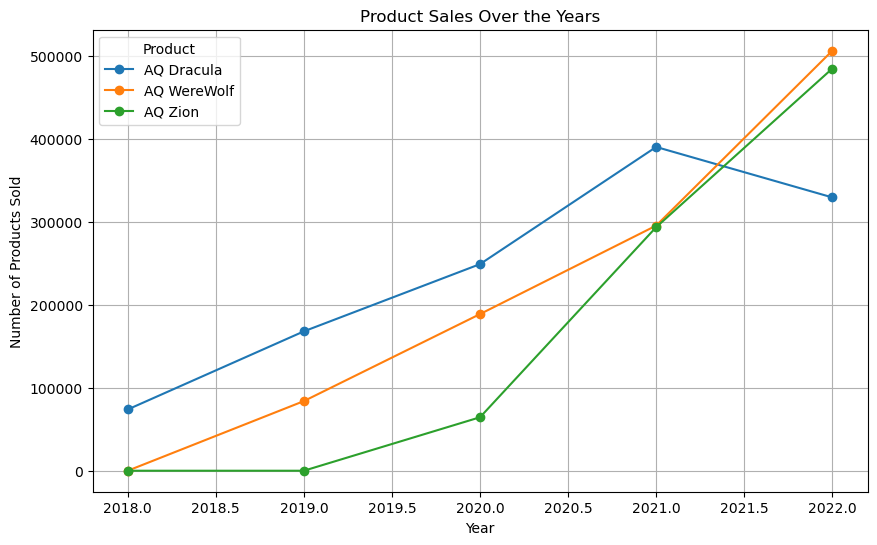

In [30]:
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'AQ Dracula': [73905, 168152, 249242, 390575, 329707],
    'AQ WereWolf': [0, 84006, 188971, 295705, 506672],
    'AQ Zion': [0, 0, 64502, 293806, 485156]
}

# Creating a DataFrame from the dictionary
df = pd.DataFrame(data)

# Setting the 'Year' column as the index
df.set_index('Year', inplace=True)

# Plotting the data
df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Product Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Products Sold')
plt.grid(True)
plt.legend(title='Product')
plt.show()

Graph above shows yearly trend of sales on all three products. Sales of AQ Dracula were increasing steadily from 2018 to 2021 with decrease in 2021-2022. Sales of AQ WereWolf were consistenly rising with a greater increase in 2021-2022, where sales of it surpassed sales of AQ Dracula. Sales of AQ Zion initially were not as high, but in 2021 onwards whey were on the level of AQ WereWolf and also surpassed sales of AQ Dracula.

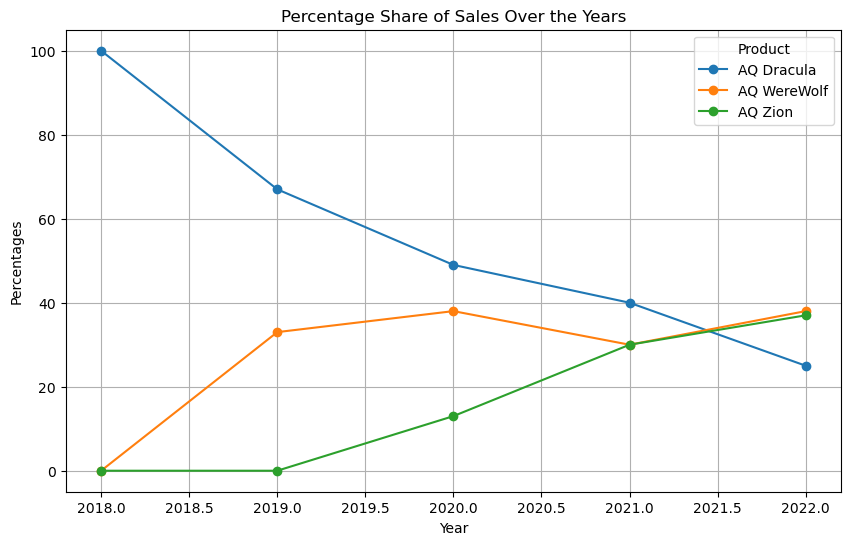

In [31]:
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'AQ Dracula': [100, 67, 49, 40, 25],
    'AQ WereWolf': [0, 33, 38, 30, 38],
    'AQ Zion': [0, 0, 13, 30, 37]
}

# Creating a DataFrame from the dictionary
df = pd.DataFrame(data)

# Setting the 'Year' column as the index
df.set_index('Year', inplace=True)

# Plotting the data
df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Percentage Share of Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentages')
plt.grid(True)
plt.legend(title='Product')
plt.show()

Graph above shows the percentage share of sales over the years. AQ Dracula was consistently losing its sales share, as other product were introduced, resulting in 25% of total sales in 2022. AQ WereWolf was introduced a year later and overall its share of sales was staying around 30-35%. AQ Zion is the product that was introduced 2 years after AQ Dracula, and its share of sales was consistently rising each each, no only resulting in a biggest share of sales, alongside AQ WereWolf, but also getting higher share of sales than that of a AQ Dracula of ~ 40%

Way 2: Comparison by month

In [32]:
def sales_total(division, category, product):
    query7=f"""
    Select dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.date, fact_sales_monthly.fiscal_year as "Fiscal Year"
    from dim_product
    right join fact_sales_monthly
    on fact_sales_monthly.product_code=dim_product.product_code
    where division = '{division}' and category = '{category}' and product IN {product}
    """
    product = pd.read_sql_query(query7, con)
    return product

In [33]:
sales = sales_total('P & A', 'Internal HDD', ('AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache', 'AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm', 'AQ Zion Saga'))
sales

,product_code,division,category,product,variant,product_code,sold_quantity,date,Fiscal Year
0,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,51,2017-09-01,2018
1,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,77,2017-09-01,2018
2,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,17,2017-09-01,2018
3,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,6,2017-09-01,2018
4,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,A0118150101,5,2017-09-01,2018
...,...,...,...,...,...,...,...,...,...
50421,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,287,2021-12-01,2022
50422,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,233,2021-12-01,2022
50423,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,27,2021-12-01,2022
50424,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,A0321150303,23,2021-12-01,2022


In [34]:
sales_per_month = sales.groupby(['date', 'product'])['sold_quantity'].sum().reset_index()
sales_per_month

,date,product,sold_quantity
0,2017-09-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,5237
1,2017-10-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,6472
2,2017-11-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,9642
3,2017-12-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,9572
4,2018-01-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,5223
...,...,...,...
115,2021-11-01,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,152496
116,2021-11-01,AQ Zion Saga,144344
117,2021-12-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,104626
118,2021-12-01,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,158040


In [35]:
fig = px.line(sales_per_month,
              x="date", y="sold_quantity",title='Sales per product', color='product'
               )
fig.show()

Graph above couple of things: first is that there are clear increases in number of products sold each year, especially around November-December. Secondly, it shows that up until 2nd hald of 2021, AQ Dracula HDD was the bestselling product, although other products were also having good sales. However, in September 2021, there was surprising surge of AQ WereWolf and AQ Zion Saga sales, that surpassed that of AQ Dracula. 

As I have analyzed the product side of the business, it is also important to analyze the companies' side of business, to analyze, which platform, channel and customer has the biggest number of sales. By estimating which particular channel or country has the most sales, comparing to another, I can start analyzing what are the bestselling product in those countries. 

In [36]:
query8="""
Select dim_customer.customer_code, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market, fact_sales_monthly.customer_code, fact_sales_monthly.date, fact_sales_monthly.sold_quantity, fact_sales_monthly.fiscal_year as "Fiscal Year"
from dim_customer
left join fact_sales_monthly
on fact_sales_monthly.customer_code=dim_customer.customer_code
"""
product=pd.read_sql_query(query8, con)
product

,customer_code,customer,platform,channel,market,customer_code,date,sold_quantity,Fiscal Year
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,17,2018
1,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,17,2018
2,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,25,2018
3,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,42,2018
4,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,51,2018
...,...,...,...,...,...,...,...,...,...
67245,90027207,Amazon,E-Commerce,Retailer,Brazil,90027207,2021-12-01,28,2022
67246,90027207,Amazon,E-Commerce,Retailer,Brazil,90027207,2021-12-01,30,2022
67247,90027207,Amazon,E-Commerce,Retailer,Brazil,90027207,2021-12-01,44,2022
67248,90027207,Amazon,E-Commerce,Retailer,Brazil,90027207,2021-12-01,58,2022


Lets see on platform

In [37]:
platform_info = product.groupby(['platform']).agg({'platform' : 'count', 'sold_quantity' : 'sum'})
platform_info['share of total orders'] = (platform_info['platform'] / platform_info['platform'].sum()) * 100
platform_info['share of total sales'] = (platform_info['sold_quantity'] / platform_info['sold_quantity'].sum()) * 100
platform_info

,platform,sold_quantity,share of total orders,share of total sales
platform,,,,
Brick & Mortar,47979,2657627,71.344238,70.253044
E-Commerce,19271,1125308,28.655762,29.746956


Brick & Mortal platform had 71.34% of all the orders and 70.25% of total number of products sold. Therefore it is interesting to dive deeper into Brick & Mortar platform.

In [38]:
query9="""
Select dim_customer.customer_code, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market, fact_sales_monthly.customer_code, fact_sales_monthly.date, fact_sales_monthly.sold_quantity, fact_sales_monthly.fiscal_year as "Fiscal Year"
from dim_customer
left join fact_sales_monthly
on fact_sales_monthly.customer_code=dim_customer.customer_code
where platform = 'Brick & Mortar'
"""
product=pd.read_sql_query(query9, con)
product

,customer_code,customer,platform,channel,market,customer_code,date,sold_quantity,Fiscal Year
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,17,2018
1,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,17,2018
2,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,25,2018
3,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,42,2018
4,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,51,2018
...,...,...,...,...,...,...,...,...,...
47974,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,90025209,2021-11-01,21,2022
47975,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,90025209,2021-11-01,23,2022
47976,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,90025209,2021-11-01,25,2022
47977,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,90025209,2021-11-01,28,2022


In [39]:
channel_info = product.groupby(['channel']).agg({'channel' : 'count', 'sold_quantity' : 'sum'})
channel_info['share of total orders'] = (channel_info['channel'] / channel_info['channel'].sum()) * 100
channel_info['share of total sales'] = (channel_info['sold_quantity'] / channel_info['sold_quantity'].sum()) * 100
channel_info

,channel,sold_quantity,share of total orders,share of total sales
channel,,,,
Direct,5441,264399,11.340378,9.948687
Distributor,1926,443286,4.014256,16.679767
Retailer,40612,1949942,84.645366,73.371545


Retailer sales channel had 84.64% of all the orders and 73.37% of total number of products sold. Because the majority of the sales were made through Retailer channel, in order to look at the bestselling products, it is better to look at that specific channel.

In [40]:
query10="""
Select dim_customer.customer_code, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market, fact_sales_monthly.customer_code, fact_sales_monthly.date, fact_sales_monthly.sold_quantity, fact_sales_monthly.fiscal_year as "Fiscal Year"
from dim_customer
left join fact_sales_monthly
on fact_sales_monthly.customer_code=dim_customer.customer_code
where platform = 'Brick & Mortar' and channel = 'Retailer'
"""
product=pd.read_sql_query(query10, con)
product

,customer_code,customer,platform,channel,market,customer_code,date,sold_quantity,Fiscal Year
0,90001020,Zone,Brick & Mortar,Retailer,China,90001020,2017-10-01,1,2018
1,90001020,Zone,Brick & Mortar,Retailer,China,90001020,2017-10-01,2,2018
2,90001020,Zone,Brick & Mortar,Retailer,China,90001020,2017-10-01,2,2018
3,90001020,Zone,Brick & Mortar,Retailer,China,90001020,2017-10-01,3,2018
4,90001020,Zone,Brick & Mortar,Retailer,China,90001020,2017-10-01,4,2018
...,...,...,...,...,...,...,...,...,...
40607,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,90025209,2021-11-01,21,2022
40608,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,90025209,2021-11-01,23,2022
40609,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,90025209,2021-11-01,25,2022
40610,90025209,Electricalsbea Stores,Brick & Mortar,Retailer,Columbia,90025209,2021-11-01,28,2022


Lets look at different customers, which had the most sales 

In [41]:
customers_bm_retailer = product.groupby('customer')['sold_quantity'].sum().reset_index().sort_values(by='sold_quantity', ascending=False)
customers_bm_retailer['percent of total'] = (customers_bm_retailer['sold_quantity'] / customers_bm_retailer['sold_quantity'].sum()) * 100
customers_bm_retailer.head(10)

,customer,sold_quantity,percent of total
21,Electricalsocity,79352,4.069454
50,Propel,69637,3.571234
20,Electricalslytical,67150,3.443692
0,Acclaimed Stores,65848,3.376921
28,Expression,65085,3.337792
29,Ezone,58649,3.007730
33,Girias,58604,3.005423
64,Vijay Sales,57918,2.970242
53,Reliance Digital,57811,2.964755
67,walmart,56963,2.921266


It appears that there are no customers that had considerably higher number of products in the Brick & Mortar platform and in the Retailer channel. 

However, maybe by looking into countries I will find out which ones had the biggest number of sales. 

Furthermore, in the Brick & Mortar platform there is no Amazon, which is something that also needs to be looked into.

In [42]:
countries_bm_retailer = product.groupby('market')['sold_quantity'].sum().reset_index().sort_values(by='sold_quantity', ascending=False)
countries_bm_retailer['percent of total'] = (countries_bm_retailer['sold_quantity'] / countries_bm_retailer['sold_quantity'].sum()) * 100
countries_bm_retailer.head()

,market,sold_quantity,percent of total
9,India,677519,34.745598
22,USA,340092,17.441134
23,United Kingdom,129650,6.648916
3,Canada,115111,5.903304
7,France,101027,5.181026


India and USA are two markets with most number of products sold by looking into Brick & Mortar platform and Retailer channel. Their market share was 52%

In [43]:
query11="""
Select distinct dim_customer.market, sum(fact_sales_monthly.sold_quantity) as sold_quantity
from dim_customer
left join fact_sales_monthly
on fact_sales_monthly.customer_code=dim_customer.customer_code
group by market
order by sum(fact_sales_monthly.sold_quantity) desc
limit 5
"""
product=pd.read_sql_query(query11, con)
product

,market,sold_quantity
0,India,1087710
1,USA,609825
2,South Korea,341767
3,Canada,197068
4,Philiphines,191884


In [44]:
countries_bm_retailer = product.groupby('market')['sold_quantity'].sum().reset_index().sort_values(by='sold_quantity', ascending=False)
countries_bm_retailer['percent of total'] = (countries_bm_retailer['sold_quantity'] / countries_bm_retailer['sold_quantity'].sum()) * 100
countries_bm_retailer.head()

,market,sold_quantity,percent of total
1,India,1087710,44.793914
4,USA,609825,25.113724
3,South Korea,341767,14.074598
0,Canada,197068,8.115625
2,Philiphines,191884,7.902139


Without filters for platforms and channels, India and USA were bigger makter share - 69.9% and got the most number of products sold. In order to look for bestselling products, it is better to look at it under different angle and consider just these two countries. 

In [45]:
query12="""
Select dim_customer.customer_code, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market, fact_sales_monthly.customer_code, fact_sales_monthly.date, fact_sales_monthly.sold_quantity, fact_sales_monthly.fiscal_year as "Fiscal Year"
from dim_customer
left join fact_sales_monthly
on fact_sales_monthly.customer_code=dim_customer.customer_code
where market = 'USA' or market = 'India'
"""
product=pd.read_sql_query(query12, con)
product

,customer_code,customer,platform,channel,market,customer_code,date,sold_quantity,Fiscal Year
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,17,2018
1,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,17,2018
2,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,25,2018
3,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,42,2018
4,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,70002017,2017-09-01,51,2018
...,...,...,...,...,...,...,...,...,...
12708,90022083,Ebay,E-Commerce,Retailer,USA,90022083,2021-12-01,665,2022
12709,90022083,Ebay,E-Commerce,Retailer,USA,90022083,2021-12-01,952,2022
12710,90022083,Ebay,E-Commerce,Retailer,USA,90022083,2021-12-01,1064,2022
12711,90022083,Ebay,E-Commerce,Retailer,USA,90022083,2021-12-01,1177,2022


In [46]:
platform_info = product.groupby(['platform']).agg({'platform' : 'count', 'sold_quantity' : 'sum'})
platform_info['share of total orders'] = (platform_info['platform'] / platform_info['platform'].sum()) * 100
platform_info['share of total sales'] = (platform_info['sold_quantity'] / platform_info['sold_quantity'].sum()) * 100
platform_info

,platform,sold_quantity,share of total orders,share of total sales
platform,,,,
Brick & Mortar,8859,1112516,69.684575,65.537147
E-Commerce,3854,585019,30.315425,34.462853


ALthough E-Commerce plarform amounts to 34% of total quantity sold, I cannot eliminate it from the analysis this time round. 

In [47]:
channel_info = product.groupby(['channel']).agg({'channel' : 'count', 'sold_quantity' : 'sum'})
channel_info['share of total orders'] = (channel_info['channel'] / channel_info['channel'].sum()) * 100
channel_info['share of total sales'] = (channel_info['sold_quantity'] / channel_info['sold_quantity'].sum()) * 100
channel_info

,channel,sold_quantity,share of total orders,share of total sales
channel,,,,
Direct,1543,194653,12.137182,11.466803
Retailer,11170,1502882,87.862818,88.533197


Only 11% of total products sold in USA and in India were done through direct sales. So in order to find bestselling products I need to look into retailer channel.

In [48]:
query13="""
Select distinct dim_customer.customer, sum(fact_sales_monthly.sold_quantity) as 'Quantity Sold'
from dim_customer
left join fact_sales_monthly
on fact_sales_monthly.customer_code=dim_customer.customer_code
where (market = 'USA' or market = 'India') and channel = 'Retailer'
group by customer
order by sum(fact_sales_monthly.sold_quantity) desc
"""
product=pd.read_sql_query(query13, con)
product.head(10)

,customer,Quantity Sold
0,Amazon,164795
1,Flipkart,123374
2,Amazon,101042
3,Ebay,96060
4,Propel,63071
5,Electricalsocity,60208
6,Ezone,58649
7,Girias,58604
8,Vijay Sales,57918
9,Expression,57781


In [49]:
product['percent of total'] = (product['Quantity Sold'] / product['Quantity Sold'].sum()) * 100
product.head(10)

,customer,Quantity Sold,percent of total
0,Amazon,164795,10.965265
1,Flipkart,123374,8.209161
2,Amazon,101042,6.723216
3,Ebay,96060,6.391719
4,Propel,63071,4.196670
5,Electricalsocity,60208,4.006169
6,Ezone,58649,3.902435
7,Girias,58604,3.899441
8,Vijay Sales,57918,3.853796
9,Expression,57781,3.844680


It appears that Amazon amounts to 17.7% of total number of products sold. This is the customer that had the biggest number of quantity sold.

Other companies with highest number of quantity sold are: Flipkart, Ebay, Propel and Electricalsocity

My further analysis with be done looking only at this 5 customers that have nearly 41% of total quantity sold.

Let's combine everything together

## US and Indian markets

In [50]:
query14="""
Select fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.fiscal_year as "Fiscal Year", dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market
from fact_sales_monthly
inner join dim_product on dim_product.product_code = fact_sales_monthly.product_code
inner join dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
where (market = 'USA' or market = 'India') and (channel = 'Retailer') and (customer = 'Amazon ' or customer = 'Amazon' or customer = 'Flipkart' or customer = 'Ebay' or customer = 'Propel' or customer = 'Electricalsocity')
"""
product=pd.read_sql_query(query14, con)
product

,product_code,sold_quantity,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0118150101,27,2019,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,India
1,A0118150101,32,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,India
2,A0118150101,40,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,India
3,A0118150101,53,2019,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,India
4,A0118150101,54,2021,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,India
...,...,...,...,...,...,...,...,...,...,...,...,...
3847,A0418150104,60,2019,A0418150104,P & A,Graphic Card,AQ Mforce Gen X,Plus 1,Ebay,E-Commerce,Retailer,USA
3848,A0418150104,77,2018,A0418150104,P & A,Graphic Card,AQ Mforce Gen X,Plus 1,Ebay,E-Commerce,Retailer,USA
3849,A0418150104,79,2018,A0418150104,P & A,Graphic Card,AQ Mforce Gen X,Plus 1,Ebay,E-Commerce,Retailer,USA
3850,A0418150104,85,2019,A0418150104,P & A,Graphic Card,AQ Mforce Gen X,Plus 1,Ebay,E-Commerce,Retailer,USA


In [51]:
product.groupby('division')['product'].count().reset_index()

,division,product
0,P & A,3852


In [52]:
category_info = product.groupby(['category']).agg({'category' : 'count', 'sold_quantity' : 'sum'})
category_info['share of total orders'] = (category_info['category'] / category_info['category'].sum()) * 100
category_info['share of total sales'] = (category_info['sold_quantity'] / category_info['sold_quantity'].sum()) * 100
category_info

,category,sold_quantity,share of total orders,share of total sales
category,,,,
Graphic Card,1092,110894,28.34891,18.22266
Internal HDD,2760,497656,71.65109,81.77734


Internal HDD still the most popular category of products within Peripherals segment.

In [53]:
query15="""
Select fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.date, fact_sales_monthly.fiscal_year as "Fiscal Year", dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market
from fact_sales_monthly
inner join dim_product on dim_product.product_code = fact_sales_monthly.product_code
inner join dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
where (market = 'USA' or market = 'India') and (channel = 'Retailer') and (customer = 'Amazon ' or customer = 'Amazon' or customer = 'Flipkart' or customer = 'Ebay' or customer = 'Propel' or customer = 'Electricalsocity') and (category = 'Internal HDD')
"""
product=pd.read_sql_query(query15, con)
product

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0118150101,47,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Flipkart,E-Commerce,Retailer,India
1,A0118150101,58,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Ebay,E-Commerce,Retailer,India
2,A0118150101,32,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Propel,Brick & Mortar,Retailer,India
3,A0118150101,39,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Flipkart,E-Commerce,Retailer,USA
4,A0118150101,37,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,A0321150303,1326,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Propel,Brick & Mortar,Retailer,India
2756,A0321150303,615,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,India
2757,A0321150303,1194,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Flipkart,E-Commerce,Retailer,USA
2758,A0321150303,1049,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,USA


In [54]:
product_info = product.groupby(['product']).agg({'product' : 'count', 'sold_quantity' : 'sum'})
product_info['share of total orders'] = (product_info['product'] / product_info['product'].sum()) * 100
product_info['share of total sales'] = (product_info['sold_quantity'] / product_info['sold_quantity'].sum()) * 100
product_info

,product,sold_quantity,share of total orders,share of total sales
product,,,,
AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,1500,196689,54.347826,39.523084
AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,810,165566,29.347826,33.269166
AQ Zion Saga,450,135401,16.304348,27.207750


It appears that in Indian and US markets, AQ Dracula HDD was bestselling product, closely followed by AQ WereWolf

I want to check the yearly changes in the Indian and US markets

In [55]:
sales_per_month = product.groupby(['date', 'product'])['sold_quantity'].sum().reset_index()
sales_per_month

,date,product,sold_quantity
0,2017-09-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,941
1,2017-10-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,1429
2,2017-11-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,2003
3,2017-12-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,1943
4,2018-01-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,918
...,...,...,...
115,2021-11-01,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,21476
116,2021-11-01,AQ Zion Saga,23796
117,2021-12-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,16661
118,2021-12-01,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,23642


In [56]:
fig = px.line(sales_per_month,
              x="date", y="sold_quantity",title='Sales per product in USA and India', color='product'
               )
fig.show()

Alhough, table above was telling that AQ Dracula is the bestselling product, it is due to the fact that it was the most popular product in previous years. In 2021, especially in the 2nd half, both AQ WereWolf and AQ Zion were selling better than AQ Dracula. At the end of 2021, AQ Zion was the bestselling product, but overall, taking into consideration sales figures of previous years, AQ Dracula still sold more.

Lets look at variants:

In [57]:
def sales_us_india(product, customer):
    query16=f"""
    Select fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.date, fact_sales_monthly.fiscal_year as "Fiscal Year", dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market
    from fact_sales_monthly
    inner join dim_product on dim_product.product_code = fact_sales_monthly.product_code
    inner join dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
    where (market = 'USA' or market = 'India') and channel = 'Retailer' and category = 'Internal HDD' and product = '{product}' and customer IN {customer}   
    """
    product = pd.read_sql_query(query16, con)
    return product

In [58]:
dracula_sales = sales_us_india('AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache', ('Amazon', 'Amazon ', 'Flipkart', 'Ebay', 'Propel', 'Electricalsocity'))
dracula_sales

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0118150101,47,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Flipkart,E-Commerce,Retailer,India
1,A0118150101,58,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Ebay,E-Commerce,Retailer,India
2,A0118150101,32,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Propel,Brick & Mortar,Retailer,India
3,A0118150101,39,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Flipkart,E-Commerce,Retailer,USA
4,A0118150101,37,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A0118150104,1760,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Propel,Brick & Mortar,Retailer,India
1496,A0118150104,1522,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,India
1497,A0118150104,449,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Flipkart,E-Commerce,Retailer,USA
1498,A0118150104,445,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,USA


In [59]:
AQDracula_variants_us_info = dracula_sales.groupby(['variant']).agg({'variant' : 'count', 'sold_quantity' : 'sum'})
AQDracula_variants_us_info['share of total orders'] = (AQDracula_variants_us_info['variant'] / AQDracula_variants_us_info['variant'].sum()) * 100
AQDracula_variants_us_info['share of total sales'] = (AQDracula_variants_us_info['sold_quantity'] / AQDracula_variants_us_info['sold_quantity'].sum()) * 100
AQDracula_variants_us_info

,variant,sold_quantity,share of total orders,share of total sales
variant,,,,
Plus,360,37304,24.0,18.965982
Premium,390,61025,26.0,31.026138
Premium Plus,390,60911,26.0,30.968178
Standard,360,37449,24.0,19.039702


In [60]:
sales_per_month = dracula_sales.groupby(['date', 'variant'])['sold_quantity'].sum().reset_index()
sales_per_month

fig = px.line(sales_per_month,
              x="date", y="sold_quantity",title='Sales of AQ Dracula in US and Indian markets', color='variant'
               )
fig.show()

Graph above shows surpsiring discovery - there is no data for Standard and Plus variants for AQ Dracula, only for Premium and Premium Plus. This is the reason why these two variants are so popular - they are the only one available. Furthermore, it explains why sales figures for AQ Dracula after July 2021 were much lower.

In [61]:
werewolf_sales = sales_us_india('AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm', ('Amazon', 'Amazon ', 'Flipkart', 'Ebay', 'Propel', 'Electricalsocity'))
werewolf_sales

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0219150201,119,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Flipkart,E-Commerce,Retailer,India
1,A0219150201,98,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Ebay,E-Commerce,Retailer,India
2,A0219150201,30,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Propel,Brick & Mortar,Retailer,India
3,A0219150201,56,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Flipkart,E-Commerce,Retailer,USA
4,A0219150201,44,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Amazon,E-Commerce,Retailer,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,A0220150203,1363,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Propel,Brick & Mortar,Retailer,India
806,A0220150203,1804,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,India
807,A0220150203,1307,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Flipkart,E-Commerce,Retailer,USA
808,A0220150203,1180,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,USA


In [62]:
AQWereWolf_variants_us_info = werewolf_sales.groupby(['variant']).agg({'variant' : 'count', 'sold_quantity' : 'sum'})
AQWereWolf_variants_us_info['share of total orders'] = (AQWereWolf_variants_us_info['variant'] / AQWereWolf_variants_us_info['variant'].sum()) * 100
AQWereWolf_variants_us_info['share of total sales'] = (AQWereWolf_variants_us_info['sold_quantity'] / AQWereWolf_variants_us_info['sold_quantity'].sum()) * 100
AQWereWolf_variants_us_info

,variant,sold_quantity,share of total orders,share of total sales
variant,,,,
Plus,300,55731,37.037037,33.660897
Premium,210,52566,25.925926,31.749272
Standard,300,57269,37.037037,34.589831


In [63]:
sales_per_month = werewolf_sales.groupby(['date', 'variant'])['sold_quantity'].sum().reset_index()
sales_per_month

fig = px.line(sales_per_month,
              x="date", y="sold_quantity",title='Sales of AQ WereWolf in US and Indian markets', color='variant'
               )
fig.show()

Throughout the years, all three variants were in tough competition, but in the last 3rd of 2021, sales of Plus variant slowed down, while Standard variant and especially Premium variant had their sales increased.

In [64]:
zion_sales = sales_us_india('AQ Zion Saga', ('Amazon', 'Amazon ', 'Flipkart', 'Ebay', 'Propel', 'Electricalsocity'))
zion_sales

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0320150301,202,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Flipkart,E-Commerce,Retailer,India
1,A0320150301,92,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Ebay,E-Commerce,Retailer,India
2,A0320150301,173,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Propel,Brick & Mortar,Retailer,India
3,A0320150301,33,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Flipkart,E-Commerce,Retailer,USA
4,A0320150301,84,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Amazon,E-Commerce,Retailer,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,A0321150303,1326,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Propel,Brick & Mortar,Retailer,India
446,A0321150303,615,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,India
447,A0321150303,1194,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Flipkart,E-Commerce,Retailer,USA
448,A0321150303,1049,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,USA


In [65]:
query24="""
Select fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.date, fact_sales_monthly.fiscal_year as "Fiscal Year", dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market
from fact_sales_monthly
inner join dim_product on dim_product.product_code = fact_sales_monthly.product_code
inner join dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
where (market = 'USA' or market = 'India') and (channel = 'Retailer') and (customer = 'Amazon ' or customer = 'Amazon' or customer = 'Flipkart' or customer = 'Ebay' or customer = 'Propel' or customer = 'Electricalsocity') and (category = 'Internal HDD') and (product = 'AQ Zion Saga')
"""
product=pd.read_sql_query(query24, con)
product

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0320150301,202,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Flipkart,E-Commerce,Retailer,India
1,A0320150301,92,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Ebay,E-Commerce,Retailer,India
2,A0320150301,173,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Propel,Brick & Mortar,Retailer,India
3,A0320150301,33,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Flipkart,E-Commerce,Retailer,USA
4,A0320150301,84,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Amazon,E-Commerce,Retailer,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,A0321150303,1326,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Propel,Brick & Mortar,Retailer,India
446,A0321150303,615,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,India
447,A0321150303,1194,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Flipkart,E-Commerce,Retailer,USA
448,A0321150303,1049,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,USA


In [66]:
AQZion_variants_us_info = zion_sales.groupby(['variant']).agg({'variant' : 'count', 'sold_quantity' : 'sum'})
AQZion_variants_us_info['share of total orders'] = (AQZion_variants_us_info['variant'] / AQZion_variants_us_info['variant'].sum()) * 100
AQZion_variants_us_info['share of total sales'] = (AQZion_variants_us_info['sold_quantity'] / AQZion_variants_us_info['sold_quantity'].sum()) * 100
AQZion_variants_us_info

,variant,sold_quantity,share of total orders,share of total sales
variant,,,,
Plus,120,44021,26.666667,32.511577
Premium,120,37595,26.666667,27.765674
Standard,210,53785,46.666667,39.722749


What about the rest of the world:

In [67]:
sales_per_month = zion_sales.groupby(['date', 'variant'])['sold_quantity'].sum().reset_index()
sales_per_month

fig = px.line(sales_per_month,
              x="date", y="sold_quantity",title='Sales of AQ Zion Saga in US and Indian markets', color='variant'
               )
fig.show()

Overall, Standard version was the bestselling one for AQ Zion due to the fact that it had more years of sales. But even after introduction of other variants, it was pretty competitive. At the end of the 2021, Plus variant was the bestselling one - lead that it took in September 2021.

## Rest of the World

In [68]:
query17="""
Select fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.date, fact_sales_monthly.fiscal_year as "Fiscal Year", dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market
from fact_sales_monthly
inner join dim_product on dim_product.product_code = fact_sales_monthly.product_code
inner join dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
where market not in ('USA', 'India') and (channel = 'Retailer') and (customer = 'Amazon ' or customer = 'Amazon' or customer = 'Flipkart' or customer = 'Ebay' or customer = 'Propel' or customer = 'Electricalsocity') and (category = 'Internal HDD')
"""
product=pd.read_sql_query(query17, con)
product

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0118150101,48,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,South Korea
1,A0118150101,10,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Electricalsocity,Brick & Mortar,Retailer,Australia
2,A0118150101,0,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Germany
3,A0118150101,1,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Canada
4,A0118150101,4,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6542,A0321150303,108,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,United Kingdom
6543,A0321150303,329,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Canada
6544,A0321150303,233,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Canada
6545,A0321150303,23,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile


In [69]:
product_info = product.groupby(['product']).agg({'product' : 'count', 'sold_quantity' : 'sum'})
product_info['share of total orders'] = (product_info['product'] / product_info['product'].sum()) * 100
product_info['share of total sales'] = (product_info['sold_quantity'] / product_info['sold_quantity'].sum()) * 100
product_info

,product,sold_quantity,share of total orders,share of total sales
product,,,,
AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,3214,99345,49.091187,38.631291
AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,2081,87870,31.785551,34.169123
AQ Zion Saga,1252,69947,19.123263,27.199586


In the rest of the world, the situation with regards to the share of the total sales is similar - AQ Dracula is the bestselling product, closely followed by AQ WereWolf.

In [70]:
sales_per_month = product.groupby(['date', 'product'])['sold_quantity'].sum().reset_index()
sales_per_month

,date,product,sold_quantity
0,2017-09-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,228
1,2017-10-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,393
2,2017-11-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,635
3,2017-12-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,480
4,2018-01-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,233
...,...,...,...
115,2021-11-01,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,11486
116,2021-11-01,AQ Zion Saga,12506
117,2021-12-01,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,8072
118,2021-12-01,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,13165


In [71]:
fig = px.line(sales_per_month,
              x="date", y="sold_quantity",title='Sales per product in Rest of the World', color='product'
               )
fig.show()

In rest of the world markets, situation is similar to that of the Indian and US markets. Bestselling product here was for the many years AQ Dracula, but after August 2021, sales AQ WereWolf and AQ Zion were higher. At the end of the 2021, AQ WereWolf in the bestselling product, but it wouldnt be surprising if AQ Dracula will regain its place as a bestselling product. 

It is also important to estimate which variant of the products were the most popular one

In [72]:
def sales_row(product, customer):
    query18=f"""
    Select fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.date, fact_sales_monthly.fiscal_year as "Fiscal Year", dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market
    from fact_sales_monthly
    inner join dim_product on dim_product.product_code = fact_sales_monthly.product_code
    inner join dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
    where market not in ('USA', 'India') and channel = 'Retailer' and category = 'Internal HDD' and product = '{product}' and customer IN {customer}   
    """
    product = pd.read_sql_query(query18, con)
    return product

In [73]:
dracula_sales_row = sales_row('AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache', ('Amazon', 'Amazon ', 'Flipkart', 'Ebay', 'Propel', 'Electricalsocity'))
dracula_sales_row

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0118150101,48,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,South Korea
1,A0118150101,10,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Electricalsocity,Brick & Mortar,Retailer,Australia
2,A0118150101,0,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Germany
3,A0118150101,1,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Canada
4,A0118150101,4,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,A0118150104,397,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,United Kingdom
3210,A0118150104,491,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,Canada
3211,A0118150104,192,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,Canada
3212,A0118150104,13,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,Chile


In [74]:
AQDracula_variants_row_info = dracula_sales_row.groupby(['variant']).agg({'variant' : 'count', 'sold_quantity' : 'sum'})
AQDracula_variants_row_info['share of total orders'] = (AQDracula_variants_row_info['variant'] / AQDracula_variants_row_info['variant'].sum()) * 100
AQDracula_variants_row_info['share of total sales'] = (AQDracula_variants_row_info['sold_quantity'] / AQDracula_variants_row_info['sold_quantity'].sum()) * 100
AQDracula_variants_row_info

,variant,sold_quantity,share of total orders,share of total sales
variant,,,,
Plus,761,18184,23.677660,18.303890
Premium,845,30907,26.291226,31.110776
Premium Plus,849,31908,26.415681,32.118375
Standard,759,18346,23.615432,18.466959


In [75]:
sales_per_month = dracula_sales_row.groupby(['date', 'variant'])['sold_quantity'].sum().reset_index()
sales_per_month

fig = px.line(sales_per_month,
              x="date", y="sold_quantity",title='Sales per product in Rest of the World', color='variant'
               )
fig.show()

Due to the same issue of removing 2 out of 4 variants, both Premium and Premium Plus variants soared up in sales. At the end of 2021, Premium variant was outperforming Premium Plus, which was the bestselling variant since August 2021.

In [76]:
werewolf_sales_row = sales_row('AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm', ('Amazon', 'Amazon ', 'Flipkart', 'Ebay', 'Propel', 'Electricalsocity'))
werewolf_sales_row

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0219150201,6,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Amazon,E-Commerce,Retailer,Pakistan
1,A0219150201,46,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Amazon,E-Commerce,Retailer,South Korea
2,A0219150201,20,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Electricalsocity,Brick & Mortar,Retailer,Australia
3,A0219150201,2,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Amazon,E-Commerce,Retailer,Bangladesh
4,A0219150201,18,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Amazon,E-Commerce,Retailer,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,A0220150203,374,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,United Kingdom
2077,A0220150203,106,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,Canada
2078,A0220150203,429,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,Canada
2079,A0220150203,38,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,Chile


In [77]:
AQWereWolf_variants_row_info = werewolf_sales_row.groupby(['variant']).agg({'variant' : 'count', 'sold_quantity' : 'sum'})
AQWereWolf_variants_row_info['share of total orders'] = (AQWereWolf_variants_row_info['variant'] / AQWereWolf_variants_row_info['variant'].sum()) * 100
AQWereWolf_variants_row_info['share of total sales'] = (AQWereWolf_variants_row_info['sold_quantity'] / AQWereWolf_variants_row_info['sold_quantity'].sum()) * 100
AQWereWolf_variants_row_info

,variant,sold_quantity,share of total orders,share of total sales
variant,,,,
Plus,752,29896,36.136473,34.022989
Premium,581,27301,27.919270,31.069762
Standard,748,30673,35.944258,34.907249


In [78]:
sales_per_month = werewolf_sales_row.groupby(['date', 'variant'])['sold_quantity'].sum().reset_index()
sales_per_month

fig = px.line(sales_per_month,
              x="date", y="sold_quantity",title='Sales per product in Rest of the World', color='variant'
               )
fig.show()

All three variants, as in US and Indian markets, are extremely competitive comparing to each other. At the end of 2021, Standard variant of AQ WereWolf was the bestselling one, following by Plus variant. 

In [79]:
zion_sales_row = sales_row('AQ Zion Saga', ('Amazon', 'Amazon ', 'Flipkart', 'Ebay', 'Propel', 'Electricalsocity'))
zion_sales_row

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0320150301,6,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Amazon,E-Commerce,Retailer,Japan
1,A0320150301,43,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Amazon,E-Commerce,Retailer,Pakistan
2,A0320150301,19,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Amazon,E-Commerce,Retailer,South Korea
3,A0320150301,14,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Electricalsocity,Brick & Mortar,Retailer,Australia
4,A0320150301,22,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Amazon,E-Commerce,Retailer,Bangladesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,A0321150303,108,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,United Kingdom
1248,A0321150303,329,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Canada
1249,A0321150303,233,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Canada
1250,A0321150303,23,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile


In [80]:
AQZion_variants_row_info = zion_sales_row.groupby(['variant']).agg({'variant' : 'count', 'sold_quantity' : 'sum'})
AQZion_variants_row_info['share of total orders'] = (AQZion_variants_row_info['variant'] / AQZion_variants_row_info['variant'].sum()) * 100
AQZion_variants_row_info['share of total sales'] = (AQZion_variants_row_info['sold_quantity'] / AQZion_variants_row_info['sold_quantity'].sum()) * 100
AQZion_variants_row_info

,variant,sold_quantity,share of total orders,share of total sales
variant,,,,
Plus,336,21399,26.837061,30.593163
Premium,336,20391,26.837061,29.152072
Standard,580,28157,46.325879,40.254764


In [81]:
sales_per_month = zion_sales_row.groupby(['date', 'variant'])['sold_quantity'].sum().reset_index()
sales_per_month

fig = px.line(sales_per_month,
              x="date", y="sold_quantity",title='Sales per product in Rest of the World', color='variant'
               )
fig.show()

AQ Zion is the the most recently introduced product in the lineup. 2 more variants were introduced only year after initial introduction of the product. Because of this, difficult to dispute the fact that Standard variant is not the bestselling one. But looking at the end of 2021, Plus variant took the lead in sales, closely following by Premium Variant.

## Hypotheses

In [82]:
import math
from scipy import stats

In [83]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')

## Hypothesis 1 - differences in sales between US & India VS ROW

In [84]:
query23="""
Select fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.date, fact_sales_monthly.fiscal_year as "Fiscal Year", dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market
from fact_sales_monthly
inner join dim_product on dim_product.product_code = fact_sales_monthly.product_code
inner join dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
where (market = 'USA' or market = 'India') and (channel = 'Retailer') and (category = 'Internal HDD')
"""
product_us_india=pd.read_sql_query(query23, con)
product_us_india

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0118150101,42,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Reliance Digital,Brick & Mortar,Retailer,India
1,A0118150101,40,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Croma,Brick & Mortar,Retailer,India
2,A0118150101,54,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Ezone,Brick & Mortar,Retailer,India
3,A0118150101,77,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Lotus,Brick & Mortar,Retailer,India
4,A0118150101,30,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Viveks,Brick & Mortar,Retailer,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999,A0321150303,247,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Costco,Brick & Mortar,Retailer,USA
8000,A0321150303,725,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,walmart,Brick & Mortar,Retailer,USA
8001,A0321150303,546,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Staples,Brick & Mortar,Retailer,USA
8002,A0321150303,1049,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,USA


In [85]:
sales_us_india = product_us_india.groupby(['date'])['sold_quantity'].sum().reset_index()
sales_us_india

,date,sold_quantity
0,2017-09-01,2941
1,2017-10-01,3644
2,2017-11-01,5123
3,2017-12-01,5306
4,2018-01-01,2973
5,2018-02-01,2967
6,2018-03-01,3089
7,2018-04-01,2936
8,2018-05-01,2937
9,2018-06-01,2899


In [86]:
query24="""
Select fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.date, fact_sales_monthly.fiscal_year as "Fiscal Year", dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market
from fact_sales_monthly
inner join dim_product on dim_product.product_code = fact_sales_monthly.product_code
inner join dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
where market not in ('USA', 'India') and (channel = 'Retailer') and (category = 'Internal HDD')
"""
product_row=pd.read_sql_query(query24, con)
product_row

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0118150101,1,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Taobao,E-Commerce,Retailer,China
1,A0118150101,15,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Acclaimed Stores,Brick & Mortar,Retailer,Indonesia
2,A0118150101,9,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Insight,Brick & Mortar,Retailer,Philiphines
3,A0118150101,48,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,South Korea
4,A0118150101,9,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Forward Stores,Brick & Mortar,Retailer,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31187,A0321150303,287,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,walmart,Brick & Mortar,Retailer,Canada
31188,A0321150303,233,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Canada
31189,A0321150303,27,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Electricalsbea Stores,Brick & Mortar,Retailer,Chile
31190,A0321150303,23,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile


In [87]:
sales_row = product_row.groupby(['date'])['sold_quantity'].sum().reset_index()
sales_row

,date,sold_quantity
0,2017-09-01,693
1,2017-10-01,1066
2,2017-11-01,1404
3,2017-12-01,1237
4,2018-01-01,756
5,2018-02-01,702
6,2018-03-01,834
7,2018-04-01,753
8,2018-05-01,685
9,2018-06-01,661


In [88]:
hist_us_india = px.histogram(sales_us_india, x='sold_quantity', nbins=30)
hist_us_india.show()

In [89]:
hist_row = px.histogram(sales_row, x='sold_quantity', nbins=30)
hist_row.show()

In [90]:
fig = px.bar(sales_us_india, x='date', y='sold_quantity')
fig.show()

In [91]:
fig = px.bar(sales_row, x='date', y='sold_quantity')
fig.show()

In [92]:
testing_average(sales_us_india['sold_quantity'],sales_row['sold_quantity'],alpha=0.05)

0.07755163973636046
Fail to Reject H0


Results of the hypothesis tells that there are no differences in sales between different markets (US & India vs ROW). From the graphs above, where sales per month can be seen and compared, it is a reasonable result. Furthermore, histogram of the sales of US & India are similar albeit not very, comparing to sales in ROW.

## Hypothesis 2 - differences in sales between US & India VS ROW with only top 5 companies

In [93]:
query25="""
Select fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.date, fact_sales_monthly.fiscal_year as "Fiscal Year", dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market
from fact_sales_monthly
inner join dim_product on dim_product.product_code = fact_sales_monthly.product_code
inner join dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
where (market = 'USA' or market = 'India') and (channel = 'Retailer') and (category = 'Internal HDD') and (customer = 'Amazon ' or customer = 'Amazon' or customer = 'Flipkart' or customer = 'Ebay' or customer = 'Propel' or customer = 'Electricalsocity')
"""
product_us_india_5comp=pd.read_sql_query(query25, con)
product_us_india_5comp

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0118150101,47,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Flipkart,E-Commerce,Retailer,India
1,A0118150101,58,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Ebay,E-Commerce,Retailer,India
2,A0118150101,32,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Propel,Brick & Mortar,Retailer,India
3,A0118150101,39,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Flipkart,E-Commerce,Retailer,USA
4,A0118150101,37,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,A0321150303,1326,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Propel,Brick & Mortar,Retailer,India
2756,A0321150303,615,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,India
2757,A0321150303,1194,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Flipkart,E-Commerce,Retailer,USA
2758,A0321150303,1049,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,USA


In [94]:
sales_us_india_5comp = product_us_india_5comp.groupby(['date'])['sold_quantity'].sum().reset_index()
sales_us_india_5comp

,date,sold_quantity
0,2017-09-01,941
1,2017-10-01,1429
2,2017-11-01,2003
3,2017-12-01,1943
4,2018-01-01,918
5,2018-02-01,1440
6,2018-03-01,1277
7,2018-04-01,1212
8,2018-05-01,1093
9,2018-06-01,1335


In [95]:
query26="""
Select fact_sales_monthly.product_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.date, fact_sales_monthly.fiscal_year as "Fiscal Year", dim_product.product_code, dim_product.division, dim_product.category, dim_product.product, dim_product.variant, dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market
from fact_sales_monthly
inner join dim_product on dim_product.product_code = fact_sales_monthly.product_code
inner join dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
where market not in ('USA', 'India') and (channel = 'Retailer') and (category = 'Internal HDD') and (customer = 'Amazon ' or customer = 'Amazon' or customer = 'Flipkart' or customer = 'Ebay' or customer = 'Propel' or customer = 'Electricalsocity')
"""
product_row_5comp=pd.read_sql_query(query26, con)
product_row_5comp

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0118150101,48,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,South Korea
1,A0118150101,10,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Electricalsocity,Brick & Mortar,Retailer,Australia
2,A0118150101,0,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Germany
3,A0118150101,1,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Canada
4,A0118150101,4,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6542,A0321150303,108,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,United Kingdom
6543,A0321150303,329,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Canada
6544,A0321150303,233,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Canada
6545,A0321150303,23,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile


In [96]:
sales_row_5comp = product_row_5comp.groupby(['date'])['sold_quantity'].sum().reset_index()
sales_row

,date,sold_quantity
0,2017-09-01,693
1,2017-10-01,1066
2,2017-11-01,1404
3,2017-12-01,1237
4,2018-01-01,756
5,2018-02-01,702
6,2018-03-01,834
7,2018-04-01,753
8,2018-05-01,685
9,2018-06-01,661


In [97]:
hist_us_india_5comp = px.histogram(sales_us_india_5comp, x='sold_quantity', nbins=30)
hist_us_india_5comp.show()

In [98]:
hist_row_5comp = px.histogram(sales_row_5comp, x='sold_quantity', nbins=30)
hist_row_5comp.show()

In [99]:
fig = px.bar(sales_us_india_5comp, x='date', y='sold_quantity')
fig.show()

In [100]:
fig = px.bar(sales_row_5comp, x='date', y='sold_quantity')
fig.show()

In [101]:
testing_average(sales_us_india_5comp['sold_quantity'],sales_row_5comp['sold_quantity'],alpha=0.05)

0.0021275296031375386
Reject H0


Result of this hypothesis tells that there are differences in sales between different markets (US & India vs ROW), when also only top 5 companies that made the most sales takein into consideration. This is the only difference with the first hypothesis - concentrate on top 5 companies. Histograms of sales in different markets in this case are different, due to different magnitudes of sales. 

## Hypothesis 3 - differences in sales of AQ Dracula between US & India VS ROW with only top 5 companies

In [102]:
dracula_sales_us_india = dracula_sales
dracula_sales_us_india

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0118150101,47,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Flipkart,E-Commerce,Retailer,India
1,A0118150101,58,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Ebay,E-Commerce,Retailer,India
2,A0118150101,32,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Propel,Brick & Mortar,Retailer,India
3,A0118150101,39,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Flipkart,E-Commerce,Retailer,USA
4,A0118150101,37,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A0118150104,1760,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Propel,Brick & Mortar,Retailer,India
1496,A0118150104,1522,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,India
1497,A0118150104,449,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Flipkart,E-Commerce,Retailer,USA
1498,A0118150104,445,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,USA


In [103]:
AQDracula_us_india = dracula_sales_us_india.groupby(['date'])['sold_quantity'].sum().reset_index()
AQDracula_us_india

,date,sold_quantity
0,2017-09-01,941
1,2017-10-01,1429
2,2017-11-01,2003
3,2017-12-01,1943
4,2018-01-01,918
5,2018-02-01,1440
6,2018-03-01,1277
7,2018-04-01,1212
8,2018-05-01,1093
9,2018-06-01,1335


In [104]:
dracula_sales_row

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0118150101,48,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,South Korea
1,A0118150101,10,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Electricalsocity,Brick & Mortar,Retailer,Australia
2,A0118150101,0,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Germany
3,A0118150101,1,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Canada
4,A0118150101,4,2017-09-01,2018,A0118150101,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Amazon,E-Commerce,Retailer,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,A0118150104,397,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,United Kingdom
3210,A0118150104,491,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,Canada
3211,A0118150104,192,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,Canada
3212,A0118150104,13,2021-12-01,2022,A0118150104,P & A,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Premium Plus,Amazon,E-Commerce,Retailer,Chile


In [105]:
AQDracula_row = dracula_sales_row.groupby(['date'])['sold_quantity'].sum().reset_index()
AQDracula_row

,date,sold_quantity
0,2017-09-01,228
1,2017-10-01,393
2,2017-11-01,635
3,2017-12-01,480
4,2018-01-01,233
5,2018-02-01,299
6,2018-03-01,379
7,2018-04-01,265
8,2018-05-01,221
9,2018-06-01,232


In [106]:
hist_dracula_us_india_5comp = px.histogram(AQDracula_us_india, x='sold_quantity', nbins=30)
hist_dracula_us_india_5comp.show()

In [107]:
hist_dracula_row_5comp = px.histogram(AQDracula_row, x='sold_quantity', nbins=30)
hist_dracula_row_5comp.show()

In [108]:
fig = px.bar(AQDracula_us_india, x='date', y='sold_quantity')
fig.show()

In [109]:
fig = px.bar(AQDracula_row, x='date', y='sold_quantity')
fig.show()

In [110]:
testing_average(AQDracula_us_india['sold_quantity'],AQDracula_row['sold_quantity'],alpha=0.05)

1.4705608437173022e-05
Reject H0


Hypothesis above shows that there are differences in sales quantity of AQ Dracula product in US & Indian markets, comparing to other markets and graphs support this narrative - histograms of sales of different markets are clearly different and barplot, which shows sales of the product per month shows what the magnitude of sales in ROW markets is nearly twice lower, comparing to US & Indian markets. 

## Hypothesis 4 - differences in sales of AQ WereWolf between US & India VS ROW with only top 5 companies

In [111]:
werewolf_sales_us_india = werewolf_sales
werewolf_sales_us_india

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0219150201,119,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Flipkart,E-Commerce,Retailer,India
1,A0219150201,98,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Ebay,E-Commerce,Retailer,India
2,A0219150201,30,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Propel,Brick & Mortar,Retailer,India
3,A0219150201,56,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Flipkart,E-Commerce,Retailer,USA
4,A0219150201,44,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Amazon,E-Commerce,Retailer,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,A0220150203,1363,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Propel,Brick & Mortar,Retailer,India
806,A0220150203,1804,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,India
807,A0220150203,1307,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Flipkart,E-Commerce,Retailer,USA
808,A0220150203,1180,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,USA


In [112]:
AQWereWolf_us_india = werewolf_sales_us_india.groupby(['date'])['sold_quantity'].sum().reset_index()
AQWereWolf_us_india

,date,sold_quantity
0,2018-09-01,788
1,2018-10-01,1519
2,2018-11-01,1429
3,2018-12-01,1978
4,2019-01-01,882
5,2019-02-01,1135
6,2019-03-01,915
7,2019-04-01,1172
8,2019-05-01,794
9,2019-06-01,1422


In [113]:
werewolf_sales_row

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0219150201,6,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Amazon,E-Commerce,Retailer,Pakistan
1,A0219150201,46,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Amazon,E-Commerce,Retailer,South Korea
2,A0219150201,20,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Electricalsocity,Brick & Mortar,Retailer,Australia
3,A0219150201,2,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Amazon,E-Commerce,Retailer,Bangladesh
4,A0219150201,18,2018-09-01,2019,A0219150201,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Amazon,E-Commerce,Retailer,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,A0220150203,374,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,United Kingdom
2077,A0220150203,106,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,Canada
2078,A0220150203,429,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,Canada
2079,A0220150203,38,2021-12-01,2022,A0220150203,P & A,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Amazon,E-Commerce,Retailer,Chile


In [114]:
AQWereWolf_row = werewolf_sales_row.groupby(['date'])['sold_quantity'].sum().reset_index()
AQWereWolf_row

,date,sold_quantity
0,2018-09-01,316
1,2018-10-01,528
2,2018-11-01,713
3,2018-12-01,852
4,2019-01-01,310
5,2019-02-01,440
6,2019-03-01,501
7,2019-04-01,488
8,2019-05-01,423
9,2019-06-01,358


In [115]:
hist_werewolf_us_india_5comp = px.histogram(AQWereWolf_us_india, x='sold_quantity', nbins=30)
hist_werewolf_us_india_5comp.show()

In [116]:
hist_werewolf_row_5comp = px.histogram(AQWereWolf_row, x='sold_quantity', nbins=30)
hist_werewolf_row_5comp.show()

In [117]:
fig = px.bar(AQWereWolf_us_india, x='date', y='sold_quantity')
fig.show()

In [118]:
fig = px.bar(AQWereWolf_row, x='date', y='sold_quantity')
fig.show()

In [119]:
testing_average(AQWereWolf_us_india['sold_quantity'],AQWereWolf_row['sold_quantity'],alpha=0.05)

0.0010874766800189394
Reject H0


In the similar way as in previous hypothesis, current hypothesis tells that there are differences in the sale quantities of AQ WereWolf in different markets. ROW markets sell considerably less units, comparing to US and Indian markets. Histograms of both markets also very different.

Hypothesis 3-5

H0 no difference in number of sales of variants of each product across top 5 companies and countries 
H1 there is difference in number of sales of variants of each product across top 5 companies and countries 

## Hypothesis 5 - differences in sales of AQ Zion Saga between US & India VS ROW with only top 5 companies

In [120]:
zion_sales_us_india = zion_sales
zion_sales_us_india

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0320150301,202,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Flipkart,E-Commerce,Retailer,India
1,A0320150301,92,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Ebay,E-Commerce,Retailer,India
2,A0320150301,173,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Propel,Brick & Mortar,Retailer,India
3,A0320150301,33,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Flipkart,E-Commerce,Retailer,USA
4,A0320150301,84,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Amazon,E-Commerce,Retailer,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,A0321150303,1326,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Propel,Brick & Mortar,Retailer,India
446,A0321150303,615,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,India
447,A0321150303,1194,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Flipkart,E-Commerce,Retailer,USA
448,A0321150303,1049,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,USA


In [121]:
AQZion_us_india = zion_sales_us_india.groupby(['date'])['sold_quantity'].sum().reset_index()
AQZion_us_india

,date,sold_quantity
0,2019-09-01,705
1,2019-10-01,1170
2,2019-11-01,1924
3,2019-12-01,1281
4,2020-01-01,812
5,2020-02-01,806
6,2020-03-01,157
7,2020-04-01,897
8,2020-05-01,850
9,2020-06-01,1885


In [122]:
zion_sales_row

,product_code,sold_quantity,date,Fiscal Year,product_code,division,category,product,variant,customer,platform,channel,market
0,A0320150301,6,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Amazon,E-Commerce,Retailer,Japan
1,A0320150301,43,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Amazon,E-Commerce,Retailer,Pakistan
2,A0320150301,19,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Amazon,E-Commerce,Retailer,South Korea
3,A0320150301,14,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Electricalsocity,Brick & Mortar,Retailer,Australia
4,A0320150301,22,2019-09-01,2020,A0320150301,P & A,Internal HDD,AQ Zion Saga,Standard,Amazon,E-Commerce,Retailer,Bangladesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,A0321150303,108,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,United Kingdom
1248,A0321150303,329,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Canada
1249,A0321150303,233,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Canada
1250,A0321150303,23,2021-12-01,2022,A0321150303,P & A,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile


In [123]:
AQZion_row = zion_sales_row.groupby(['date'])['sold_quantity'].sum().reset_index()
AQZion_row

,date,sold_quantity
0,2019-09-01,328
1,2019-10-01,467
2,2019-11-01,984
3,2019-12-01,811
4,2020-01-01,308
5,2020-02-01,455
6,2020-03-01,140
7,2020-04-01,600
8,2020-05-01,585
9,2020-06-01,606


In [124]:
hist_zion_us_india_5comp = px.histogram(AQZion_us_india, x='sold_quantity', nbins=30)
hist_zion_us_india_5comp.show()

In [125]:
hist_zion_row_5comp = px.histogram(AQZion_row, x='sold_quantity', nbins=30)
hist_zion_row_5comp.show()

In [126]:
fig = px.bar(AQZion_us_india, x='date', y='sold_quantity')
fig.show()

In [127]:
fig = px.bar(AQZion_row, x='date', y='sold_quantity')
fig.show()

In [128]:
testing_average(AQZion_us_india['sold_quantity'],AQZion_row['sold_quantity'],alpha=0.05)

0.03382971600510642
Reject H0


Hypothesis above tells that there are differences in sales of AQ Zion in markets of US and India, comparing to the other markets. It furthermore seen in histograms above, as sales quantity distribution is different in US and Indian markers comparing to other markets. 

# CONCLUSION

### Part 1 - Product analysis

When analysing the products themselves, it appears that the only data that is available is for the Peripherals division. Therefore I could make analysis solely on that division. 

Analysis showed that out of three products AQ Dracula was the biggest one in terms of number of orders there were for this product, but in terms of number of product sold, AQ Dracula were not very far ahead of another product, AQ WereWolf. 

By looking at the sales number over the years, it can be seen that AQ Dracula, although was the bestselling product, was not anymore. AQ WereWolf and AQ Zion surpassed in sales AQ Dracula in 2021 and in 2022 being sold nearly the same. Similar can be said when looking at sales per month of all three products. It can be seen that up until August 2021, AQ Dracula was selling better than other two products, but after August 2021, something has happened that affected sales of the AQ Dracula and forced people to switch to another alternatives (products). Because of this, by looking at the graph I can state that there are two bestselling products at the end of 2021 - AQ WereWolf and AQ Zion.

### Part 2 - Market analysis 

Analysing just the products would be not enough, so I decided to also analyse market side of the data to see what are the platforms and channels that have highest number of products sold, as they will give also good indication on which companies to look with regards to the bestselling products. 

In my analysis I found out that the majority of the sales were concentrated in the Brick & Mortar platform and in the retailer channel. However, top companies with regards to the sales numbers, were very close to each other and the share of products sales were not high, so I have decided to look into countries. By looking there, I found that US and Indian markets together have more than half of all sales. Therefore, I wanted to analyse these two countries and all other countries combined. 

### Part 3 - Countries analysis 

By using knowledge of the market analysis, I used the same method when analysing the bestselling product in US & Indian markets. It appears that we have similar trends - AQ WereWolf and AQ Zion had lower sales than AQ Dracula until August 2021 and then they surpass and became the bestselling product. In this analysis, at the end of 2021, AQ WereWolf was the bestselling product, surpassing AQ Zion by 1419 units. 

Furthermore, by looking at different variants of all three products, I saw that the Standard and Plus version of the AQ Dracula stopped being sold. This may be the reason why sales of AQ Dracula were suddenly not as high. 

With regards to other markets, trends here are very similar - AQ Dracula stopped being bestselling product after August 2021, AQ WereWolf is the bestselling product at the end of 2021 slightly above AQ Zion and sales of Standard and Plus versions of AQ Dracula were stopped in August 2021. All this mean that AQ WereWolf is currently the bestselling product. 

### Part 4 - Hypotheses

I made several hypothesis testings to estimate differences in sales between two market groups - US & Indian markets and all other markets. 

First hypothesis was testing whether there is any differences in sales between these two markets groups without any extra assumptions but also by looking at all the companies that exist in the data. The result of the hypothesis showed that there are no differences in sales between these two market groups. 

Second hypothesis was testing the same thing as the first hypothesis but with adding an additional filter of top 5 companies with regards to the sale numbers. The result of the hypothesis showed that there are indeed differences in sales, as there are clearly differences in sales magnitudes between these two market groups. 

Three more hypotheses were done to test each product separately on whether there are differences in sales in these two market groups. In all three tests, results showed that there are no differences in sales in these two market groups.

# FOR THE TABLEAU

In [129]:
query140="""
Select fact_sales_monthly.date, fact_sales_monthly.product_code, fact_sales_monthly.customer_code, fact_sales_monthly.sold_quantity, fact_sales_monthly.fiscal_year, 
    dim_product.division, dim_product.segment, dim_product.category, dim_product.product, dim_product.variant, 
    dim_customer.customer, dim_customer.platform, dim_customer.channel, dim_customer.market, dim_customer.sub_zone, dim_customer.region
from fact_sales_monthly
inner join dim_product on dim_product.product_code = fact_sales_monthly.product_code
inner join dim_customer on dim_customer.customer_code = fact_sales_monthly.customer_code
"""
product_table=pd.read_sql_query(query140, con)
product_table

,date,product_code,customer_code,sold_quantity,fiscal_year,division,segment,category,product,variant,customer,platform,channel,market,sub_zone,region
0,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,2017-09-01,A0118150101,70002018,77,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,2017-09-01,A0118150101,70003181,17,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,2017-09-01,A0118150101,70003182,6,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,2017-09-01,A0118150101,70006157,5,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,Philiphines,ROA,APAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,2019-06-01,A0418150104,90013122,10,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Radio Popular,Brick & Mortar,Retailer,Italy,SE,EU
67246,2019-06-01,A0418150104,90013124,16,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Amazon,E-Commerce,Retailer,Italy,SE,EU
67247,2019-06-01,A0418150104,90014136,2,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Reliance Digital,Brick & Mortar,Retailer,Netherlands,NE,EU
67248,2019-06-01,A0418150104,90014137,1,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Media Markt,Brick & Mortar,Retailer,Netherlands,NE,EU


In [130]:
query141="""
Select *
from fact_gross_price
"""
gross_price=pd.read_sql_query(query141, con)
gross_price

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875
...,...,...,...
1177,A7321160301,2022,44.6260
1178,A7321160302,2021,43.9446
1179,A7321160302,2022,46.0399
1180,A7321160303,2021,42.8483


In [131]:
product_gross = pd.merge(product_table, gross_price, on=['product_code', 'fiscal_year'])
product_gross

,date,product_code,customer_code,sold_quantity,fiscal_year,division,segment,category,product,variant,customer,platform,channel,market,sub_zone,region,gross_price
0,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952
1,2017-09-01,A0118150101,70002018,77,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq e Store,E-Commerce,Direct,India,India,APAC,15.3952
2,2017-09-01,A0118150101,70003181,17,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC,15.3952
3,2017-09-01,A0118150101,70003182,6,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC,15.3952
4,2017-09-01,A0118150101,70006157,5,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,Philiphines,ROA,APAC,15.3952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,2019-06-01,A0418150104,90013122,10,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Radio Popular,Brick & Mortar,Retailer,Italy,SE,EU,17.5027
67246,2019-06-01,A0418150104,90013124,16,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Amazon,E-Commerce,Retailer,Italy,SE,EU,17.5027
67247,2019-06-01,A0418150104,90014136,2,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Reliance Digital,Brick & Mortar,Retailer,Netherlands,NE,EU,17.5027
67248,2019-06-01,A0418150104,90014137,1,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Media Markt,Brick & Mortar,Retailer,Netherlands,NE,EU,17.5027


In [132]:
query142="""
Select product_code, cost_year as 'fiscal_year', manufacturing_cost
from fact_manufacturing_cost
"""
manufacturing_cost=pd.read_sql_query(query142, con)
manufacturing_cost

,product_code,fiscal_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036
...,...,...,...
1177,A7321160301,2022,13.4069
1178,A7321160302,2021,12.5670
1179,A7321160302,2022,13.1954
1180,A7321160303,2021,12.9502


In [133]:
product_gross_costs = pd.merge(product_gross, manufacturing_cost, on=['product_code', 'fiscal_year'])
product_gross_costs

,date,product_code,customer_code,sold_quantity,fiscal_year,division,segment,category,product,variant,customer,platform,channel,market,sub_zone,region,gross_price,manufacturing_cost
0,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190
1,2017-09-01,A0118150101,70002018,77,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq e Store,E-Commerce,Direct,India,India,APAC,15.3952,4.6190
2,2017-09-01,A0118150101,70003181,17,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC,15.3952,4.6190
3,2017-09-01,A0118150101,70003182,6,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC,15.3952,4.6190
4,2017-09-01,A0118150101,70006157,5,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,Philiphines,ROA,APAC,15.3952,4.6190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,2019-06-01,A0418150104,90013122,10,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Radio Popular,Brick & Mortar,Retailer,Italy,SE,EU,17.5027,5.3129
67246,2019-06-01,A0418150104,90013124,16,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Amazon,E-Commerce,Retailer,Italy,SE,EU,17.5027,5.3129
67247,2019-06-01,A0418150104,90014136,2,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Reliance Digital,Brick & Mortar,Retailer,Netherlands,NE,EU,17.5027,5.3129
67248,2019-06-01,A0418150104,90014137,1,2019,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Plus 1,Media Markt,Brick & Mortar,Retailer,Netherlands,NE,EU,17.5027,5.3129


In [134]:
query143="""
Select *
from fact_pre_discount
"""
discount=pd.read_sql_query(query143, con)
discount

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
...,...,...,...
1040,90027207,2018,0.2803
1041,90027207,2019,0.2248
1042,90027207,2020,0.2386
1043,90027207,2021,0.2772


In [135]:
product_gross_costs_discount = pd.merge(product_gross_costs, discount, on=['customer_code', 'fiscal_year'])
product_gross_costs_discount

,date,product_code,customer_code,sold_quantity,fiscal_year,division,segment,category,product,variant,customer,platform,channel,market,sub_zone,region,gross_price,manufacturing_cost,pre_invoice_discount_pct
0,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
1,2017-10-01,A0118150101,70002017,54,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
2,2017-11-01,A0118150101,70002017,30,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
3,2018-01-01,A0118150101,70002017,14,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
4,2018-02-01,A0118150101,70002017,62,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,2021-11-01,A0321150303,90024184,31,2022,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,30.3060,9.1877,0.2453
67246,2021-12-01,A0321150303,90024184,23,2022,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,30.3060,9.1877,0.2453
67247,2021-10-01,A0418150103,90024184,23,2022,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,21.0913,6.0345,0.2453
67248,2021-11-01,A0418150103,90024184,24,2022,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,21.0913,6.0345,0.2453


In [136]:
final_table = product_gross_costs_discount
final_table

,date,product_code,customer_code,sold_quantity,fiscal_year,division,segment,category,product,variant,customer,platform,channel,market,sub_zone,region,gross_price,manufacturing_cost,pre_invoice_discount_pct
0,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
1,2017-10-01,A0118150101,70002017,54,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
2,2017-11-01,A0118150101,70002017,30,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
3,2018-01-01,A0118150101,70002017,14,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
4,2018-02-01,A0118150101,70002017,62,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,2021-11-01,A0321150303,90024184,31,2022,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,30.3060,9.1877,0.2453
67246,2021-12-01,A0321150303,90024184,23,2022,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,30.3060,9.1877,0.2453
67247,2021-10-01,A0418150103,90024184,23,2022,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,21.0913,6.0345,0.2453
67248,2021-11-01,A0418150103,90024184,24,2022,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,21.0913,6.0345,0.2453


In [137]:
x = final_table.groupby('customer')['sold_quantity'].sum().reset_index().sort_values(by='sold_quantity', ascending=False)
x

,customer,sold_quantity
3,Amazon,341340
7,Atliq e Store,340492
6,Atliq Exclusive,320444
2,Amazon,198879
61,Sage,141777
...,...,...
62,Saturn,7575
41,Integration Stores,6732
22,Electricalsbea Stores,5087
1,All-Out,3247


'Amazon', 'Amazon '

In [138]:
final_table = final_table.replace({'Amazon ':'Amazon'})

In [140]:
final_table

,date,product_code,customer_code,sold_quantity,fiscal_year,division,segment,category,product,variant,customer,platform,channel,market,sub_zone,region,gross_price,manufacturing_cost,pre_invoice_discount_pct
0,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
1,2017-10-01,A0118150101,70002017,54,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
2,2017-11-01,A0118150101,70002017,30,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
3,2018-01-01,A0118150101,70002017,14,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
4,2018-02-01,A0118150101,70002017,62,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,2021-11-01,A0321150303,90024184,31,2022,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,30.3060,9.1877,0.2453
67246,2021-12-01,A0321150303,90024184,23,2022,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,30.3060,9.1877,0.2453
67247,2021-10-01,A0418150103,90024184,23,2022,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,21.0913,6.0345,0.2453
67248,2021-11-01,A0418150103,90024184,24,2022,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,21.0913,6.0345,0.2453


In [149]:
final_table.groupby('variant')['sold_quantity'].sum().reset_index().sort_values(by='sold_quantity', ascending=False)

,variant,sold_quantity
2,Premium,962971
4,Standard,920705
0,Plus,860154
7,Standard 3,399751
3,Premium Plus,386569
6,Standard 2,101725
5,Standard 1,100053
1,Plus 1,51007


In [158]:
final_table = final_table.replace({'Standard 1':'Standard'})
final_table = final_table.replace({'Standard 2':'Standard'})
final_table = final_table.replace({'Standard 3':'Standard'})
final_table = final_table.replace({'Plus 1':'Plus'})

In [159]:
final_table.groupby('variant')['sold_quantity'].sum().reset_index().sort_values(by='sold_quantity', ascending=False)

,variant,sold_quantity
3,Standard,1522234
1,Premium,962971
0,Plus,911161
2,Premium Plus,386569


In [160]:
final_table

,date,product_code,customer_code,sold_quantity,fiscal_year,division,segment,category,product,variant,customer,platform,channel,market,sub_zone,region,gross_price,manufacturing_cost,pre_invoice_discount_pct
0,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
1,2017-10-01,A0118150101,70002017,54,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
2,2017-11-01,A0118150101,70002017,30,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
3,2018-01-01,A0118150101,70002017,14,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
4,2018-02-01,A0118150101,70002017,62,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,4.6190,0.0824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67245,2021-11-01,A0321150303,90024184,31,2022,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,30.3060,9.1877,0.2453
67246,2021-12-01,A0321150303,90024184,23,2022,P & A,Peripherals,Internal HDD,AQ Zion Saga,Premium,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,30.3060,9.1877,0.2453
67247,2021-10-01,A0418150103,90024184,23,2022,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,21.0913,6.0345,0.2453
67248,2021-11-01,A0418150103,90024184,24,2022,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard,Amazon,E-Commerce,Retailer,Chile,LATAM,LATAM,21.0913,6.0345,0.2453


In [162]:
final_table.to_csv('Final Project.csv', index=False)